In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category-encoders, cesium, eli5, esda, fastai, gplearn, hep-ml, hmmlearn, hpsklearn, hypertools, imbalanced-learn, kmapper, kmodes, librosa, lime, mapclassify, mlxtend, nilearn, pyLDAvis, pynndescent, qudida, rgf-python, scattertext, scikit-learn-intelex, scikit-optimize, scikit-plot, segregation, shap, sklearn-pandas, spopt, spreg, TPOT, tsfresh, umap-learn, vecstack, woodwork, yellowbrick
Note: you may need to restart the kernel to use updated packages.


In [6]:
import sklearn

In [7]:
from sklearn.datasets import load_iris

In [8]:
X,y=load_iris(return_X_y=True)

In [16]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [31]:
X.shape

(150, 4)

In [32]:
y.shape

(150,)

In [39]:
print(len(X))
print(len(y))

150
150


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
pipe=Pipeline([
    ("scaling" , StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=5))
])

In [46]:
pipe.get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scaling': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [42]:
pipe.fit(X,y)

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', KNeighborsRegressor())])

In [43]:
pred=pipe.predict(X)

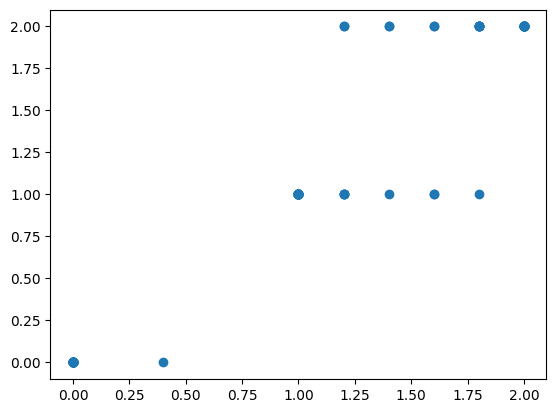

In [44]:
plt.scatter(pred,y)

In [49]:
#Using GridSearchCV
model=GridSearchCV(estimator=pipe ,
            param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,7,8,9,10]},
            cv=3)

In [51]:
model.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 7, 8, 9,
                                                10]})

In [53]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002159,0.001018,0.001292,0.000340,1,{'model__n_neighbors': 1},0.0,0.0,0.0,0.0,0.0,1
1,0.001576,0.000128,0.001268,0.000134,2,{'model__n_neighbors': 2},0.0,0.0,0.0,0.0,0.0,1
2,0.001343,0.000053,0.001030,0.000020,3,{'model__n_neighbors': 3},0.0,0.0,0.0,0.0,0.0,1
3,0.001536,0.000344,0.001199,0.000262,4,{'model__n_neighbors': 4},0.0,0.0,0.0,0.0,0.0,1
4,0.001393,0.000078,0.001091,0.000041,5,{'model__n_neighbors': 5},0.0,0.0,0.0,0.0,0.0,1
5,0.001322,0.000015,0.001160,0.000154,6,{'model__n_neighbors': 6},0.0,0.0,0.0,0.0,0.0,1
6,0.001316,0.000022,0.001063,0.000014,7,{'model__n_neighbors': 7},0.0,0.0,0.0,0.0,0.0,1
7,0.001294,0.000013,0.001034,0.000001,7,{'model__n_neighbors': 7},0.0,0.0,0.0,0.0,0.0,1
8,0.001295,0.000040,0.001123,0.000100,8,{'model__n_neighbors': 8},0.0,0.0,0.0,0.0,0.0,1
9,0.001272,0.000027,0.001042,0.000009,9,{'model__n_neighbors': 9},0.0,0.0,0.0,0.0,0.0,1


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.3, random_state = 1
)


In [15]:
RFclf = RandomForestClassifier(n_estimators = 50)
RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test)


In [16]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556
